## HOUSE RENT PREDICTIONS

* try to make it in pipeline 
    * first spplit dataset as homogenious as we can
    * encode it 
    * imputer check please
    * scale normalization check 
    * show some diagrams
    * solve with regression decison tree and random forest 


* then try to developed gui which will guess the price for a single house

![image](image.png)

this table will guide us to choose right method to get better results!
 * though we have supervised and continuous problem we should focus on random forest decision tree and linear and polynomial regression


need to set th pipeline for the solution 
* data process
    *  eda

    

### IMPORT LIBS AND GET DATASET

In [11]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
df =pd.read_csv('C:/Users/emreb/Documents/projects/houserentpre/dts/House_Rent_Dataset.csv')

###  EXAMINE THE DATASET

In [3]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [10]:
df.isna().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [27]:
df['Tenant Preferred'].value_counts()

Bachelors/Family    3444
Bachelors            830
Family               472
Name: Tenant Preferred, dtype: int64

In [52]:
df['Floor'].value_counts()

1 out of 2         379
Ground out of 2    350
2 out of 3         312
2 out of 4         308
1 out of 3         293
                  ... 
18 out of 45         1
17 out of 60         1
13 out of 16         1
9 out of 40          1
25 out of 28         1
Name: Floor, Length: 480, dtype: int64

In [23]:
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


#### tune it

In [145]:
df2 = df.copy()

In [109]:
df2 = df2.join(df['Floor'].str.split(' out of ', 1, expand=True).rename(columns={0:'floor level', 1:'total floor'}))
df2['floor level'] = df2.apply(lambda x: 0 if x['floor level'] =='Ground' \
                               else ( -1 if x['floor level'] =='Lower Basement' else (x['total floor']) ) , axis=1)
print("Status: Changed 'Ground'=0, 'Lower Basement'=-1, Rest = total_floor")
df2.drop('Floor',axis=1,inplace=True)


Status: Changed 'Ground'=0, 'Lower Basement'=-1, Rest = total_floor


In [110]:
df2.loc[df2['total floor'] == '2']

,Posted On,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,floor level,total floor
0,2022-05-18,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,2
3,2022-07-04,2,10000,800,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2,2
4,2022-05-09,2,7500,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2,2
7,2022-06-21,1,5000,250,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,1,Contact Agent,2,2
8,2022-06-07,2,26000,800,Carpet Area,"Palm Avenue Kolkata, Ballygunge",Kolkata,Unfurnished,Bachelors,2,Contact Agent,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4731,2022-06-24,2,13000,950,Super Area,"Manikonda, Outer Ring Road",Hyderabad,Unfurnished,Bachelors/Family,2,Contact Owner,2,2
4732,2022-07-08,2,7000,900,Super Area,Vinayaka Nagar,Hyderabad,Unfurnished,Bachelors/Family,1,Contact Owner,0,2
4736,2022-06-28,3,15000,1500,Super Area,Almasguda,Hyderabad,Semi-Furnished,Family,3,Contact Owner,-1,2
4737,2022-07-07,3,15000,1500,Super Area,Almasguda,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,-1,2


#### Encode Columns

* Posted on  numerical cont
* bhk        numerical disc
* rent       numerical cont
* size       numerical cont
* floor      cat       disc(ordinal)
* area type  cat       ordinal
* area loc   cat       ordinal
* city       cat       nominal
* furnished  cat       ordninal
* tenant     cat       ordinal
* poinocon   cat       ordinal

In [86]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
import datetime as dt


In [101]:
class Onehotencoderr(OneHotEncoder):
    def __init__(self, **kwargs):
        super(Onehotencoderr, self).__init__(**kwargs)
        self.fit_flag = False

    def fit(self, X, **kwargs):
        out = super().fit(X)
        self.fit_flag = True
        return out

    def transform(self, X, **kwargs):
        sparse_matrix = super(Onehotencoderr, self).transform(X)
        new_columns = self.get_new_columns(X=X)
        d_out = pd.DataFrame(
            sparse_matrix.toarray(), columns=new_columns, index=X.index
        )
        return d_out

    def fit_transform(self, X, **kwargs):
        self.fit(X)
        return self.transform(X)

    def get_new_columns(self, X):
        new_columns = []
        for i, column in enumerate(X.columns):
            j = 0
            while j < len(self.categories_[i]):
                new_columns.append(f"{column}_<{self.categories_[i][j]}>")
                j += 1
        return new_columns


In [102]:
ohe = Onehotencoderr(categories="auto", handle_unknown="ignore")
ohe.fit(df2[nomcat_vars])

Onehotencoderr()

In [103]:
df2

,Posted On,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,floor_level,total_floor
0,2022-05-18,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,2
1,2022-05-13,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,3,3
2,2022-05-16,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,3,3
3,2022-07-04,2,10000,800,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2,2
4,2022-05-09,2,7500,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,5,5
4742,2022-05-15,3,29000,2000,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,4,4
4743,2022-07-10,3,35000,1750,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,5,5
4744,2022-07-06,3,45000,1500,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent,34,34


In [81]:
y =df2[['Rent']].values
X = df2.drop('Rent',axis=1)

WE will ordinally encode area type tenant preferred and furnishing status however 

In [83]:
orcat_vars  = [ 'total floor', 'Area Type', 'Area Locality', 'Furnishing Status', 'Tenant Preferred'] 
nomcat_vars  = ['City', 'Point of Contact','Area Type']

In [75]:
X

,Posted On,BHK,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,floor_level,total_floor
0,2022-05-18,2,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,2
1,2022-05-13,2,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,3,3
2,2022-05-16,2,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,3,3
3,2022-07-04,2,800,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2,2
4,2022-05-09,2,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,1000,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,5,5
4742,2022-05-15,3,2000,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,4,4
4743,2022-07-10,3,1750,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,5,5
4744,2022-07-06,3,1500,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent,34,34


In [127]:
df['Area Type'].value_counts()

Super Area     2446
Carpet Area    2298
Built Area        2
Name: Area Type, dtype: int64

In [146]:
import category_encoders as ce

encoder= ce.OrdinalEncoder(cols=['Furnishing Status'],return_df=True,
                           mapping=[{'col':'Furnishing Status','mapping':{'Unfurnished':0,'Semi-Furnished':1,'Furnished':2}}])

df2["Furnishing Status"] = encoder.fit_transform(df2["Furnishing Status"])

In [147]:

encoder= ce.OrdinalEncoder(cols=['Area Type'],return_df=True,
                           mapping=[{'col':'Area Type','mapping':{'Built Area':0,'Super Area':1,'Carpet Area':2}}])

df2["Area Type"] = encoder.fit_transform(df2["Area Type"])

In [148]:
encoder= ce.OrdinalEncoder(cols=['Tenant Preferred'],return_df=True,
                           mapping=[{'col':'Tenant Preferred','mapping':{'Bachelors':0,'Bachelors/Family':1,'Family':2}}])

df2["Tenant Preferred"] = encoder.fit_transform(df2["Tenant Preferred"])

In [149]:
df2

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,1,Bandel,Kolkata,0,1,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,1,"Phool Bagan, Kankurgachi",Kolkata,1,1,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,1,Salt Lake City Sector 2,Kolkata,1,1,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,1,Dumdum Park,Kolkata,0,1,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,2,South Dum Dum,Kolkata,0,0,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,2,Bandam Kommu,Hyderabad,1,1,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,1,"Manikonda, Hyderabad",Hyderabad,1,1,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,2,"Himayath Nagar, NH 7",Hyderabad,1,1,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,2,Gachibowli,Hyderabad,1,2,2,Contact Agent


In [ ]:

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = ct.fit_transform(X)

#### scale or normalization

#### EDA

just look only numerical data and see correlations then we will encode all columns and will see more detailed correlations

<AxesSubplot:>

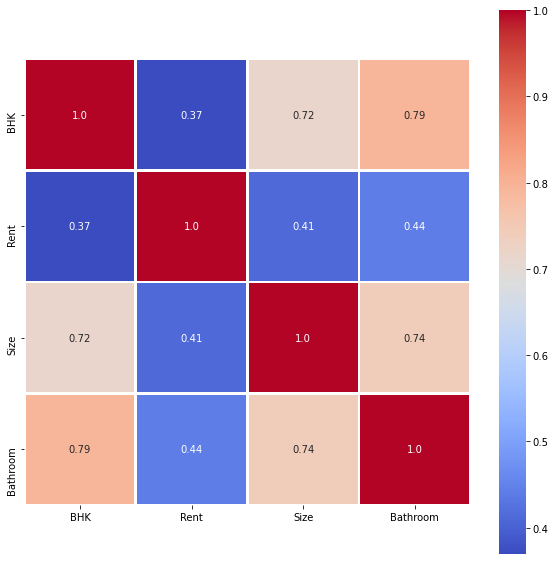

In [26]:
corr = df.corr()
plt.figure(figsize=(10, 10))
matrix = np.triu(df.corr())
sns.heatmap(corr,annot=True,fmt=".2",cmap= 'coolwarm',linewidths=2,square = True)

In [39]:
sns.set(rc={'figure.figsize':(7,8)})

In [ ]:
sns.barplot(x='total floor', y='Rent', data=df2)#money talks here

<AxesSubplot:xlabel='Bathroom', ylabel='Rent'>

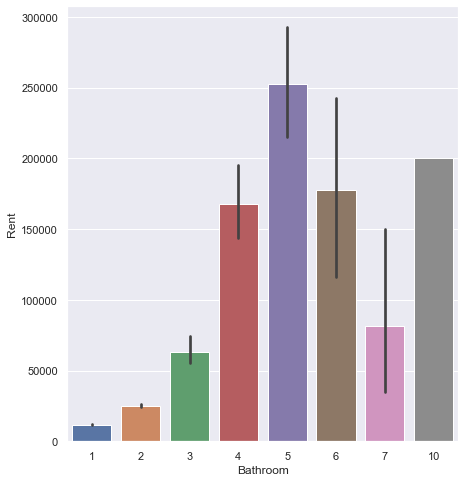

In [113]:
sns.barplot(x='Bathroom', y='Rent', data=df)#money talks here

<AxesSubplot:xlabel='City', ylabel='Bathroom'>

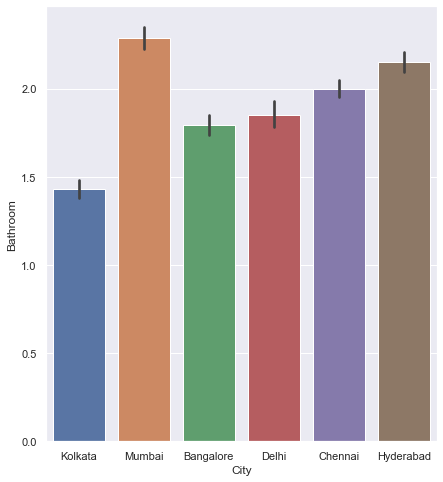

In [89]:
sns.barplot(x='City', y='Bathroom', data=df)#money talks here

<AxesSubplot:xlabel='Rent'>

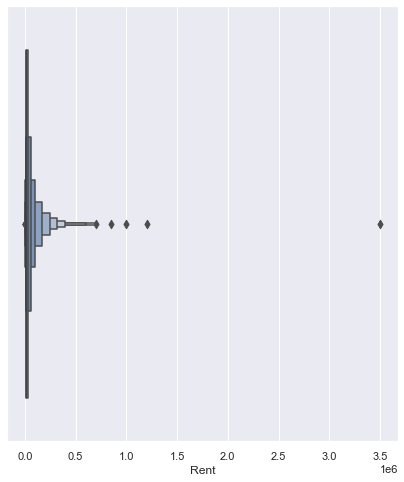

In [97]:
sns.boxenplot(x = 'Rent' , data = df)

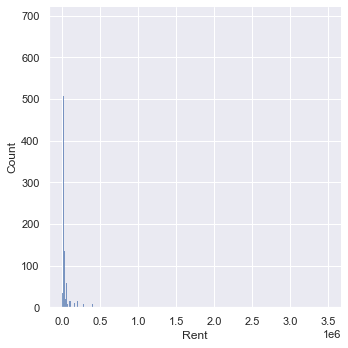

In [49]:
sns.displot(df['Rent'])

In [50]:
dflogi = np.log1p(df['Rent'])

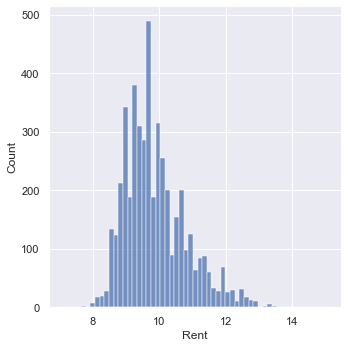

In [51]:
sns.displot(dflogi)

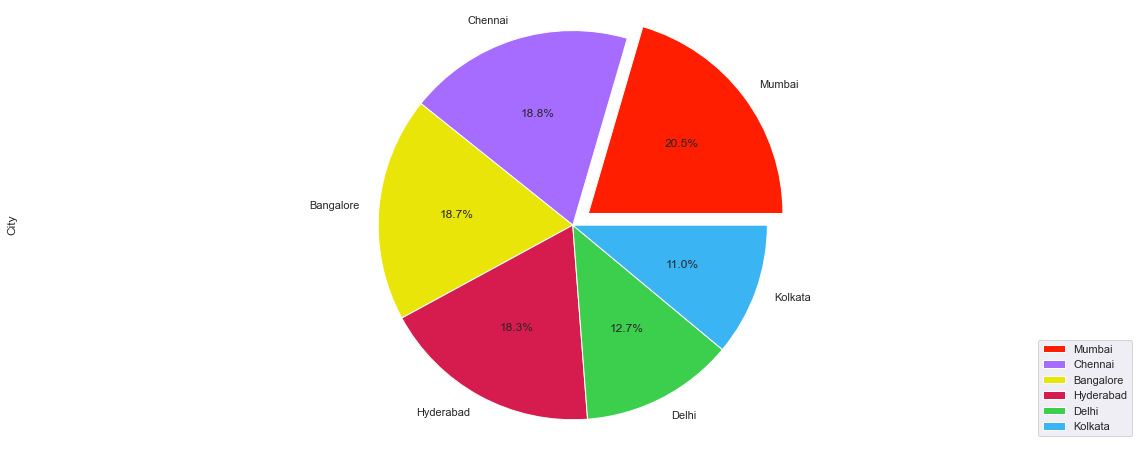

In [72]:
plt.figure(figsize = (20, 8))
counts = df["City"].value_counts()
explode = (0.1, 0, 0, 0, 0, 0)
colors = ['#FF1E00', '#A66CFF', '#EAE509', '#D61C4E', '#3CCF4E', '#3AB4F2']

counts.plot(kind = 'pie',
            colors = colors,
            explode = explode,
            autopct = '%1.1f%%')
plt.axis('equal')
plt.legend(labels = counts.index, loc = "lower right")
plt.show()

#### ML models set up

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()